In [128]:
import numpy as np
import pandas as pd
import  yfinance as yf

In [167]:
googl = yf.Ticker("GOOGL")


df = googl.history(start= "2019-08-01", end = "2020-08-01",interval= "1h")

In [168]:
#df.drop(["High", "Low", "Dividends","Stock Splits" ])
df.reset_index(inplace =True)
df.rename(columns = {"index":'Date'},  inplace =True)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-08-01 09:30:00-04:00,1217.630005,1227.489990,1214.963867,1227.199951,254178,0,0
1,2019-08-01 10:30:00-04:00,1227.410034,1236.297974,1225.859985,1236.297974,181892,0,0
2,2019-08-01 11:30:00-04:00,1236.189941,1236.189941,1229.239990,1229.589966,151028,0,0
3,2019-08-01 12:30:00-04:00,1229.645020,1231.989990,1218.000000,1219.704956,128691,0,0
4,2019-08-01 13:30:00-04:00,1217.229980,1222.079956,1210.430054,1213.313354,303165,0,0
...,...,...,...,...,...,...,...,...
1759,2020-07-31 11:30:00-04:00,1471.505005,1474.670044,1466.229980,1467.802368,340582,0,0
1760,2020-07-31 12:30:00-04:00,1467.689941,1468.910034,1455.479980,1466.310059,319524,0,0
1761,2020-07-31 13:30:00-04:00,1465.834473,1467.719971,1459.310059,1464.130005,228054,0,0
1762,2020-07-31 14:30:00-04:00,1464.880005,1475.479980,1464.359985,1474.155151,277354,0,0


In [173]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
def clean_non_trading_times(df):
    """
    :param df: Data with weekends and holidays
    :return trading_data:
    """
    # Weekends go out
    df = df[df['Date'].dt.weekday < 5].reset_index(drop=True)
    df = df.set_index('Date')
    # Remove non trading hours
    df = df.between_time('9:00','16:00')
    df.reset_index(inplace=True)
    # Holiday days we want to delete from data
    holidays = calendar().holidays(start='2000-01-01', end='2020-12-31')
    m = df['Date'].isin(holidays)
    clean_df = df[~m].copy()
    trading_data = clean_df.fillna(method='ffill')
    return trading_data

In [174]:
training_data = clean_non_trading_times(df)

In [175]:
training_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-08-01 09:30:00-04:00,1217.630005,1227.489990,1214.963867,1227.199951,254178,0,0
1,2019-08-01 10:30:00-04:00,1227.410034,1236.297974,1225.859985,1236.297974,181892,0,0
2,2019-08-01 11:30:00-04:00,1236.189941,1236.189941,1229.239990,1229.589966,151028,0,0
3,2019-08-01 12:30:00-04:00,1229.645020,1231.989990,1218.000000,1219.704956,128691,0,0
4,2019-08-01 13:30:00-04:00,1217.229980,1222.079956,1210.430054,1213.313354,303165,0,0
...,...,...,...,...,...,...,...,...
1759,2020-07-31 11:30:00-04:00,1471.505005,1474.670044,1466.229980,1467.802368,340582,0,0
1760,2020-07-31 12:30:00-04:00,1467.689941,1468.910034,1455.479980,1466.310059,319524,0,0
1761,2020-07-31 13:30:00-04:00,1465.834473,1467.719971,1459.310059,1464.130005,228054,0,0
1762,2020-07-31 14:30:00-04:00,1464.880005,1475.479980,1464.359985,1474.155151,277354,0,0


In [86]:
ds = np.genfromtxt("BTCUSD.txt", delimiter=";")

open =ds[:,2]
time_stamp = np.arange(open.shape[0])/open.shape[0]

In [104]:
def normalize(X):
    maxi, mini = max(X), min(X)
    return (2*X-mini-maxi)/(maxi-mini)


In [105]:
X_norm =  normalize(open)

In [106]:
def test_normalize():
    X = np.arange(100)
    X = normalize(X)
    assert (max(X), min(X)) == (1,-1)

In [107]:
def polar_encoding(x: float, time_stamp: float) -> float:
    # phi = arcos(x) => r*cos(phi) = r*x
    return time_stamp * x

open_polar = polar_encoding(X_norm, time_stamp)

In [112]:
def make_GAF(X):
    I = np.ones((X.shape[0],1))
    X=np.reshape(X,(X.shape[0],1))
    sqrt_val = np.sqrt(I-X**2)
    return np.matmul(X, X.T) - np.matmul(sqrt_val,sqrt_val.T)

In [109]:
GAF = make_GAF(open_polar)

In [101]:
mat = np.matmul(X_norm,np.transpose(X_norm))

In [102]:
a = np.transpose(X_norm)

In [103]:
import seaborn as sns

<AxesSubplot:>

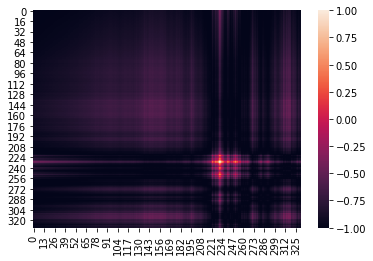

In [110]:
sns.heatmap(GAF)

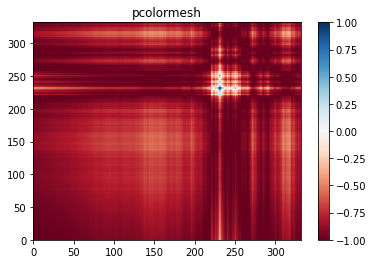

In [114]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

c = ax.pcolormesh(GAF, cmap='RdBu')
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
fig.colorbar(c, ax=ax)

plt.show()

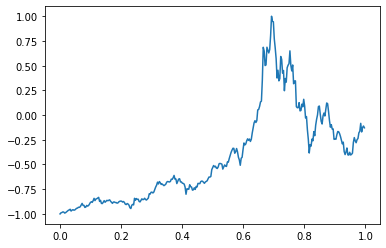

In [115]:
plt.plot(time_stamp, X_norm)

In [3]:
googl = yf.Ticker("GOOGL")


df = googl.history(start= "2020-07-01", end = "2020-08-01",interval= "1h")


In [1]:
import  yfinance as yf
import pandas as pd
from DataGeneration.raw_to_gafs_funcs import clean_non_trading_times, set_gaf_data, convert_to_gaf_and_save

In [2]:
googl = yf.Ticker("GOOGL")
df = googl.history(start= "2020-06-01", end = "2020-08-01",interval= "1h")

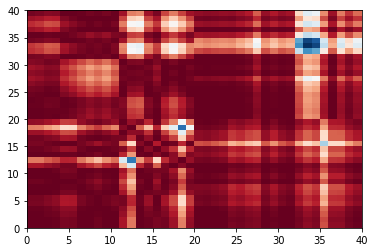

In [3]:
df = clean_non_trading_times(df)
decision_map = set_gaf_data(df)
convert_to_gaf_and_save(decision_map)

In [6]:
decision_map

{'LONG': [['2020-07-06',
   [553    1434.030029
    554    1441.319946
    555    1438.420044
    556    1442.449951
    557    1444.574951
    558    1442.599976
    576    1453.589966
    577    1459.010010
    578    1476.150024
    579    1484.549927
    580    1484.069946
    581    1477.160034
    582    1469.800049
    672    1493.280029
    673    1505.635010
    674    1498.550049
    675    1500.640015
    676    1494.540039
    677    1494.030029
    678    1499.660034
    Name: Close, dtype: float64,
    252    1374.819946
    253    1387.567505
    254    1385.650024
    255    1393.679993
    264    1392.640015
    265    1403.715454
    266    1402.229980
    267    1413.315002
    276    1431.000000
    277    1437.674988
    278    1440.434998
    279    1443.587463
    288    1453.589966
    289    1467.580017
    290    1484.309937
    291    1473.480042
    336    1493.280029
    337    1502.092529
    338    1497.590027
    339    1496.845032
    Name: Close, dtype

In [7]:
len(decision_map["SHORT"])

1